### Basic Image Handling

In [1]:
# Exercise 1 
from skimage import color, io, measure, img_as_ubyte
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import numpy as np
import pydicom as dicom

In [2]:
# Exercise 2
in_dir = "data_1/"
im_name = "metacarpals.png"
im_org = io.imread(in_dir + im_name)
print(f"shape of image: {im_org.shape}")
print(f"type of pixesls: {im_org.dtype}")

shape of image: (512, 512)
type of pixesls: uint8


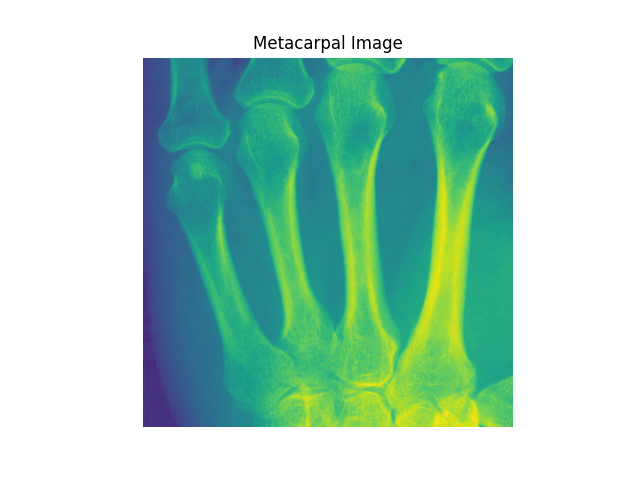

In [4]:
# Exercise 3
%matplotlib widget 
plt.imshow(im_org)
plt.title("Metacarpal Image")
plt.axis("off")
io.show()

### Color Maps

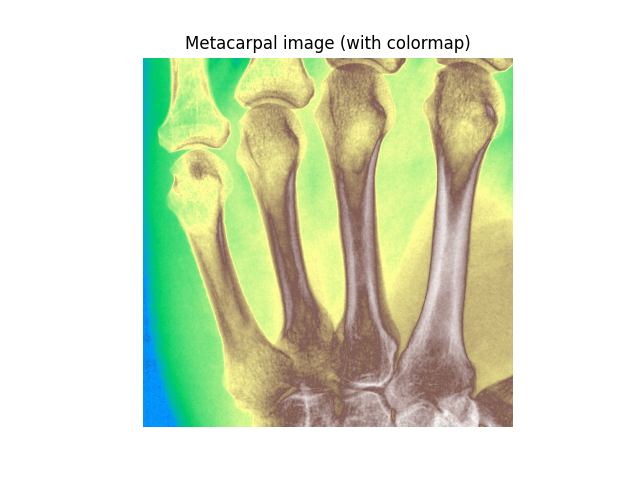

In [5]:
# Exercise 4 
plt.figure()
plt.imshow(im_org, cmap="terrain")
plt.title('Metacarpal image (with colormap)')
plt.axis("off")
plt.show()

#cmaps = [cool, hot, pink, copper, coolwarm, cubehelix, terrain , jet]

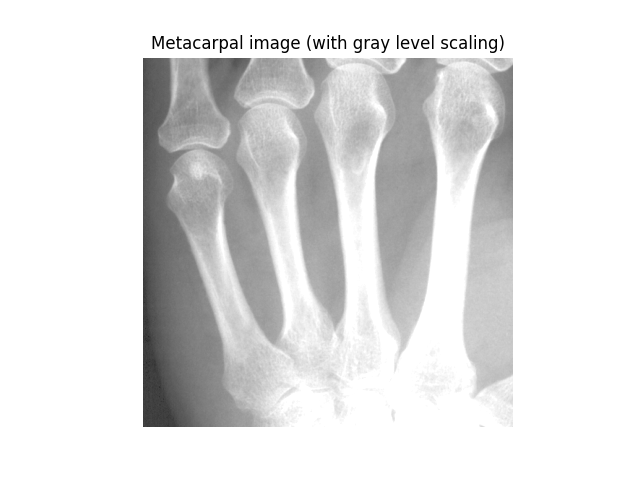

In [6]:
# Exercise 5
plt.figure()
plt.imshow(im_org, vmin=20, vmax=170, cmap = "gray")
plt.title('Metacarpal image (with gray level scaling)')
plt.axis("off")
plt.show()

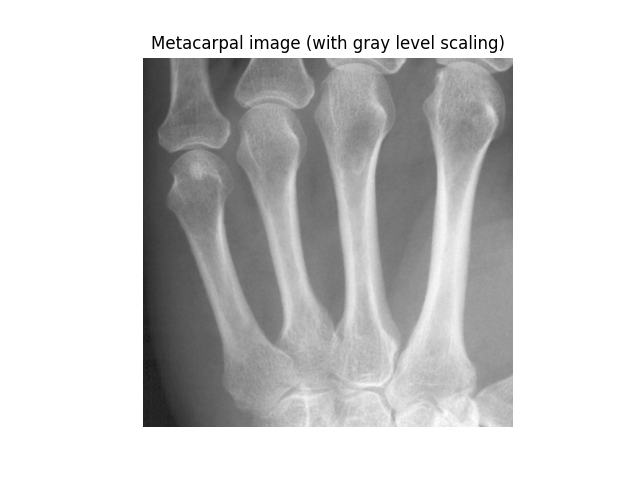

In [7]:
# Exercise 6
plt.figure()
plt.imshow(im_org, vmin=np.min(im_org), vmax=np.max(im_org), cmap = "gray")
plt.title('Metacarpal image (with gray level scaling)')
plt.axis("off")
plt.show()


### Histogram functions

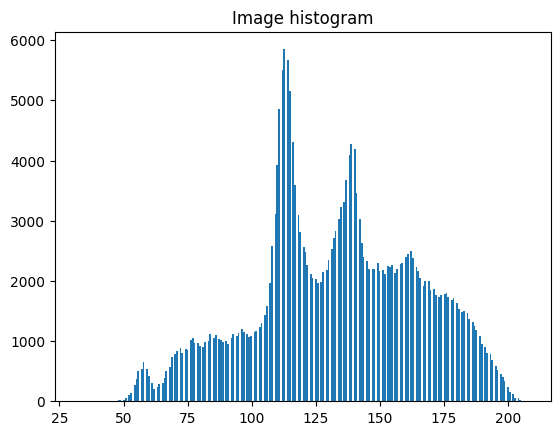

There are 1147.0 pixel values in bin 100
Bin edges: 100.75 to 101.4375


In [8]:
# Exercise 7 
%matplotlib inline 
h = plt.hist(im_org.ravel(), bins=256)
plt.title('Image histogram')
plt.show()

bin_no = 100
count = h[0][bin_no]
print(f"There are {count} pixel values in bin {bin_no}")

bin_left = h[1][bin_no]
bin_right = h[1][bin_no + 1]
print(f"Bin edges: {bin_left} to {bin_right}")

Max count: 5848.0 at: 117


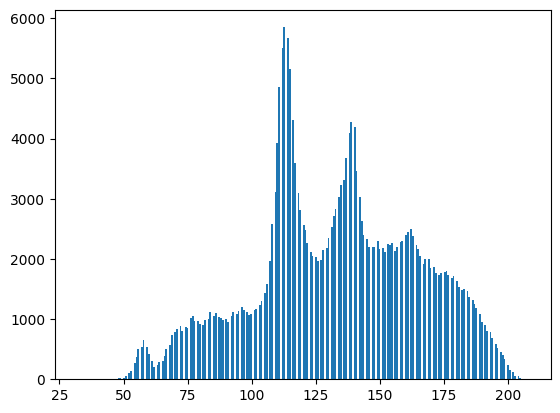

In [9]:
# Exercise 8 
y, x, _ = plt.hist(im_org.ravel(), bins=256)
max_count = y.max()
max_at = y.argmax()
print(f"Max count: {max_count} at: {max_at}")

### Pixel values and image coordinate systems

In [10]:
# Exercise 9 
r = 110
c = 90 
im_val = im_org[r, c]
print(f"The pixel value at (r,c) = ({r}, {c}) is: {im_val}")

The pixel value at (r,c) = (110, 90) is: 120


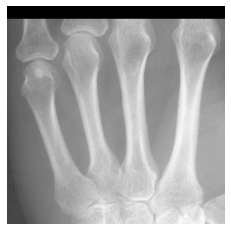

In [11]:
# Exercise 10 
im_org[:30] = 0 
plt.imshow(im_org, cmap = "gray")
plt.axis("off")
plt.show()

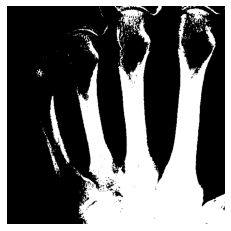

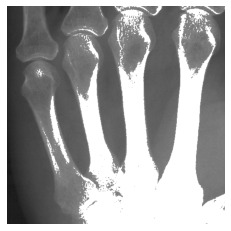

In [12]:
# Exercise 11
im_org = io.imread(in_dir + im_name)
mask = im_org > 150
plt.imshow(mask, cmap = "gray")
plt.axis("off")
plt.show()

im_org[mask] = 255
plt.imshow(im_org, cmap = "gray")
plt.axis("off")
plt.show()

### Color images

In [11]:
# Exercise 12
im_rgb = io.imread(in_dir + "ardeche.jpg")
print(f"image dimensions: {im_rgb.shape}")
print(f"image pixel type: {im_rgb.dtype}")

image dimensions: (600, 800, 3)
image pixel type: uint8


rgb code at row = 110 and column = 90: [119 178 238]


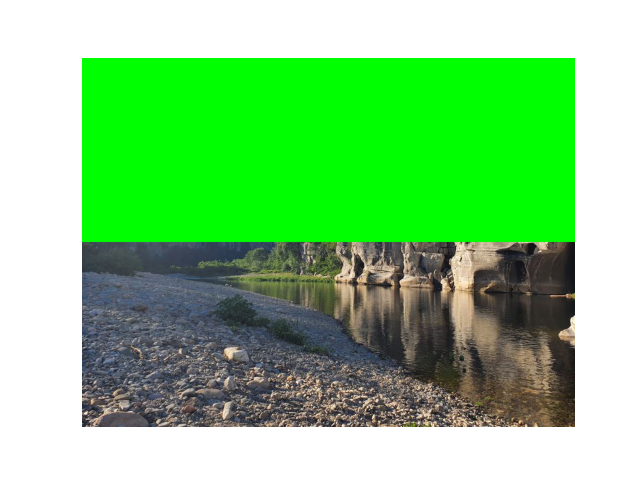

In [12]:
# Exercise 13
print(f"rgb code at row = 110 and column = 90: {im_rgb[110, 90]}")
im_rgb[:300] = [0, 255, 0]

plt.figure()
plt.imshow(im_rgb)
plt.axis("off")
plt.show()

### Working with your own image

original image dimensions: (600, 800, 3)
new image dimensions: (150, 200, 3)


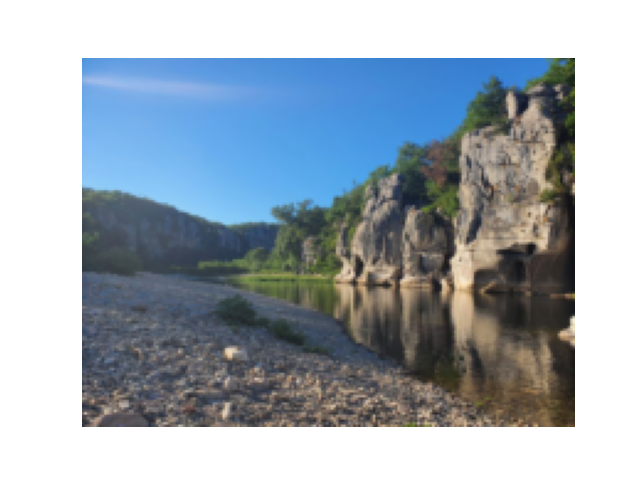

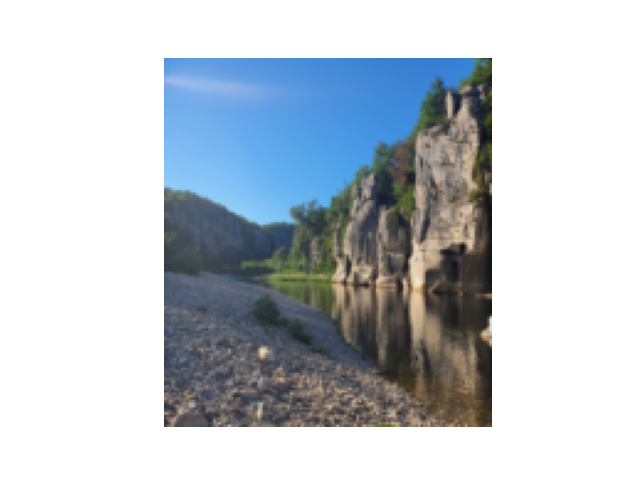

In [13]:
# Exercise 14
%matplotlib widget 
im_org = io.imread(in_dir + "ardeche.jpg")
print(f"original image dimensions: {im_rgb.shape}")

im_rescaled = rescale(im_org, 0.25, anti_aliasing=True, channel_axis=2)
print(f"new image dimensions: {im_rescaled.shape}")

plt.figure()
plt.imshow(im_rescaled)
plt.axis("off")
plt.show()

# now values are in range [0, 1]

im_resized = resize(im_org, (im_org.shape[0] // 4, im_org.shape[1] // 6), anti_aliasing=True)

plt.figure()
plt.imshow(im_resized)
plt.axis("off")
plt.show()


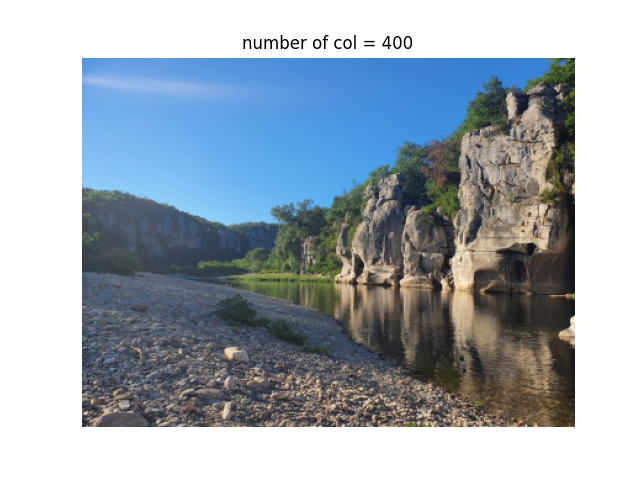

In [14]:
# Exercise 15 
nr_col = im_org.shape[1]
scale_factor = 400 / nr_col

im_400 = rescale(im_org, scale_factor, anti_aliasing=True, channel_axis=2)
plt.figure()
plt.imshow(im_400)
plt.title(f"number of col = {im_400.shape[1]}")
plt.axis("off")
plt.show()

In [15]:
# Exercise 16 
im_gray = color.rgb2gray(im_org)
im_byte = img_as_ubyte(im_gray)


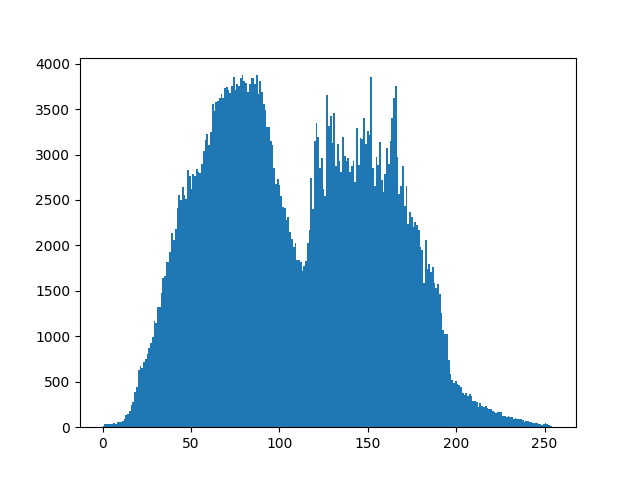

data type im_byte: uint8
data type im_gray: float64


In [16]:
# Exercise 17 
plt.figure()
plt.hist(im_byte.ravel(), bins = 256)
plt.show()

print(f"data type im_byte: {im_byte.dtype}")
print(f"data type im_gray: {im_gray.dtype}")

In [ ]:
# Exercise 18 


### Color channels

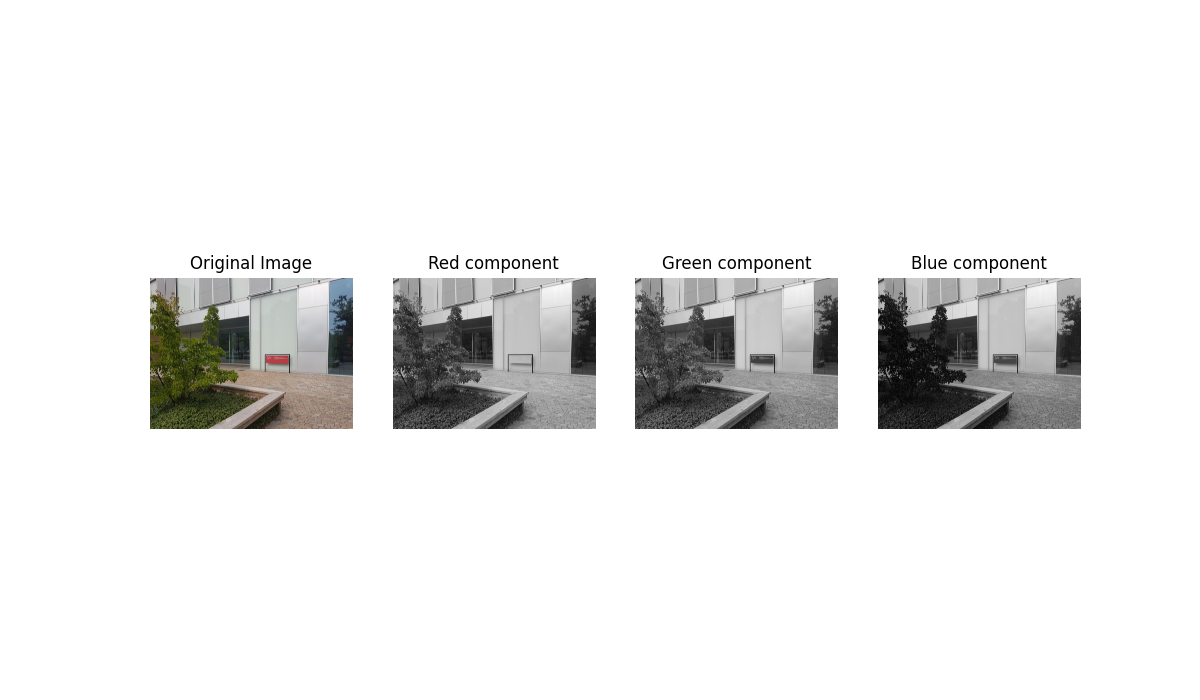

In [17]:
DTU_sign = io.imread(in_dir + "DTUSign1.jpg")
r_comp = DTU_sign[:, :, 0]
g_comp = DTU_sign[:, :, 1]
b_comp = DTU_sign[:, :, 2]


fig, ax = plt.subplots(1, 4, figsize = (12, 7))
ax[0].imshow(DTU_sign)
ax[0].axis("off")
ax[0].set_title("Original Image")
ax[1].imshow(r_comp, cmap = "gray")
ax[1].axis("off")
ax[1].set_title("Red component")
ax[2].imshow(g_comp, cmap = "gray")
ax[2].axis("off")
ax[2].set_title("Green component")
ax[3].imshow(b_comp, cmap = "gray")
ax[3].axis("off")
ax[3].set_title("Blue component")
plt.show()

### Simple Image manipulations

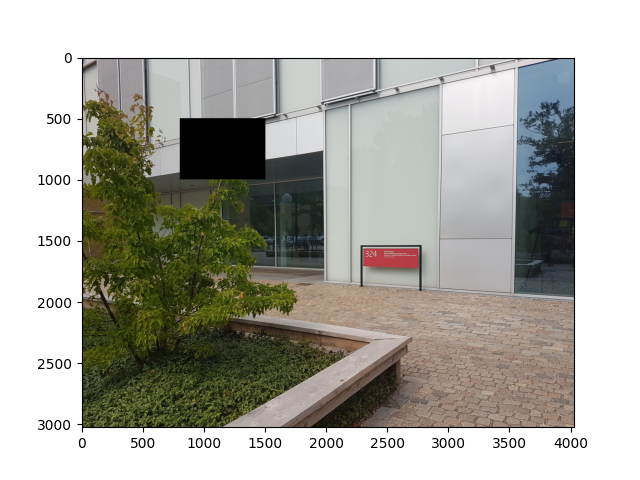

In [18]:
# Exercise 20 
%matplotlib widget 
DTU_sign[500:1000, 800:1500, :] = 0

plt.figure()
plt.imshow(DTU_sign)
plt.show()

# io.imsave("DTUSign1-marked.jpg", DTU_sign)

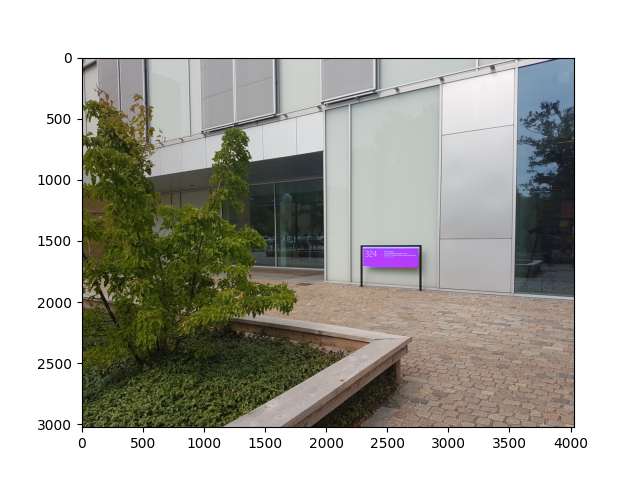

In [19]:
# Exercise 21
DTU_sign = io.imread(in_dir + "DTUSign1.jpg")

# [1550, 1700]
# [2300, 2700]
DTU_sign[1550:1720, 2300:2750, 2] = 255

plt.figure()
plt.imshow(DTU_sign)
plt.show()

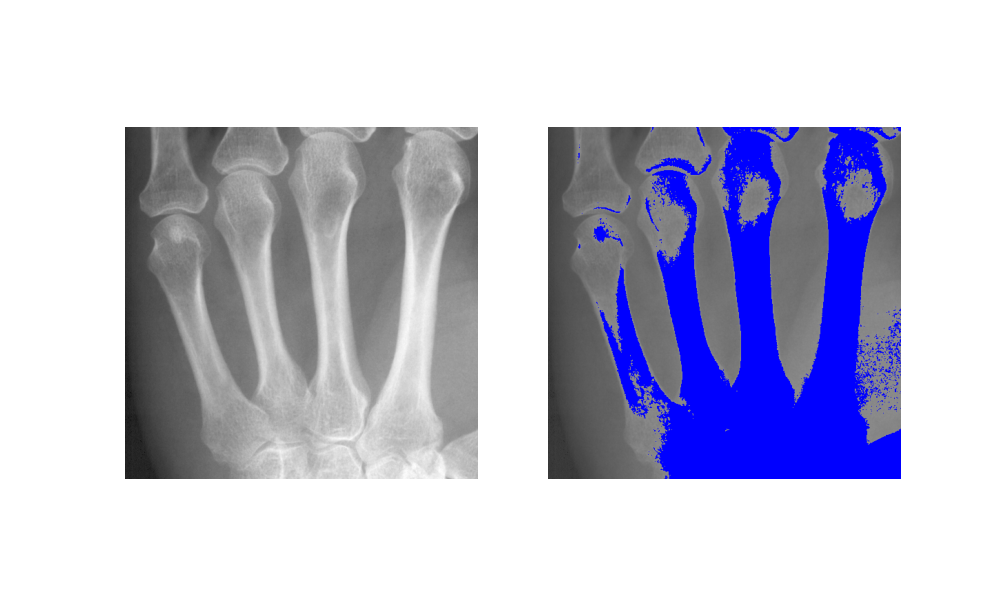

In [20]:
# Exercise 22
metacarpals_orig = io.imread(in_dir + "metacarpals.png")
metacarpals = color.gray2rgb(io.imread(in_dir + "metacarpals.png"))
metacarpals[metacarpals_orig > 140] = [0, 0, 255]
fig, ax = plt.subplots(1, 2, figsize = (10, 6))
ax[0].imshow(metacarpals_orig, cmap = "gray")
ax[0].axis("off")
ax[1].imshow(metacarpals)
ax[1].axis("off")
plt.show()

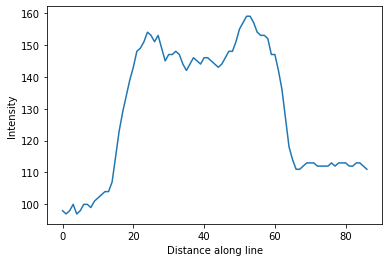

In [14]:
# Exercise 23 
%matplotlib inline 
im_org = io.imread("data_1/metacarpals.png")
p = profile_line(im_org, (342, 77), (320, 160))
plt.plot(p)
plt.ylabel('Intensity')
plt.xlabel('Distance along line')
plt.show()

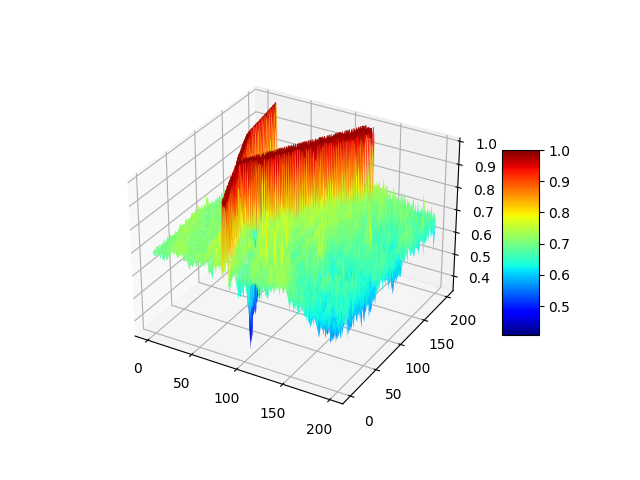

In [21]:
# Exercise 24
in_dir = "data_1/"
im_name = "road.png"
im_org = io.imread(in_dir + im_name)
im_gray = color.rgb2gray(im_org)
ll = 200
im_crop = im_gray[40:40 + ll, 150:150 + ll]
xx, yy = np.mgrid[0:im_crop.shape[0], 0:im_crop.shape[1]]
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(xx, yy, im_crop, rstride=1, cstride=1, cmap=plt.cm.jet,
linewidth=0)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

### DICOM Images

In [28]:
# Exercise 25
in_dir = "data_1/"
im_name = "1-442.dcm"
ds = dicom.dcmread(in_dir + im_name)
print(ds.Rows)
print(ds.Columns)

512
512


In [29]:
# Exercise 26
im = ds.pixel_array
im.dtype 

dtype('int16')

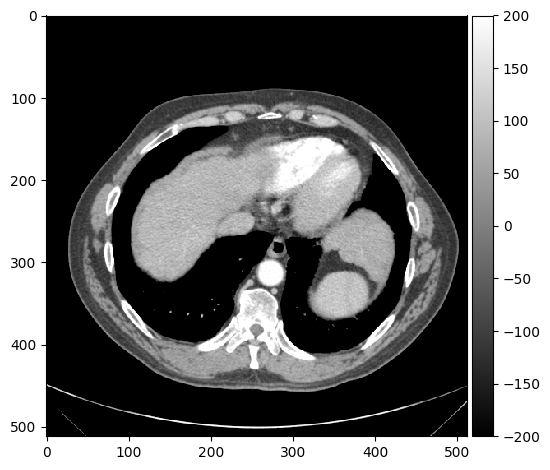

In [33]:
# Exercise 27
%matplotlib inline 
io.imshow(im, vmin=-200, vmax=200, cmap='gray')
io.show()
